# Communicate Data Findings

### by VIjaya lakshmi Venkatraman

## Preliminary Wrangling

This document explores a dataset containing flight details such as Origin state/city, destination city/state, arrival and departure delays for every day of the month along with reasons for cancellations/diversions.

In [1]:
# import the required libraries
import os
import glob
import pandas as pd
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import os.path
from os import path

%matplotlib inline

### Dataset Overview
Dataset URL : Flights data from http://stat-computing.org/dataexpo/2009/the-data.html

The entire dataset is enormous - almost 33 years of data i.e., 1987-2020. So, for the purpose of completing this project, we will only focus on a few months of data. Here only three months of data are considered (January, February and March - 2020). The required fields can be selected from the website and upon download, these are available as csv format - one for each of the month. It is more useful to have a single file than multiple files for ease of analysis and comparsion. So, lets first concatenate the data available in these files.

In [2]:
#credit : https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/
os.chdir(".\Downloads\FLIGHTS")

if (path.exists('combined_csv.csv')):
    # If the csv file has been created, just read it
    combined_csv = pd.read_csv('combined_csv.csv')
else:
    # Combined csv does not exist
    # Execute the below code to create the master file.
    extension = 'csv'
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
    # combine all files in the list
    combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
    #export to csv
    combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [3]:
print(combined_csv.shape)
print('\n')
print(combined_csv.dtypes)
print('\n')
print(combined_csv.head(3))

(1829843, 29)


YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
OP_UNIQUE_CARRIER       object
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_NM         object
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_NM           object
DEP_TIME               float64
DEP_DELAY              float64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
AIR_TIME               float64
FLIGHTS                float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 28            float64
dtype: object


   YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  

### What is the structure of your dataset?

The dataset has 1829843 rows with 29 features (year, quarter, month, day of month, day of week, flight date, arrival and departure delays and reasons for cancellations/diversions, etc.,)

### What is/are the main feature(s) of interest in your dataset?

I'm more interested in identifying what are the major reasons for cancellations/diversions, what days of a week have the most delays, what days of a month and if there is any correlation between flight duration and delays. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on visualiazing data, I think that day of a month, day of a week and flight duration may have effect on departure and arrival delays.  

Now that we are able to see that all three months of data are available in the master file, lets have a look at the columns and their datatypes.

In [4]:
combined_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829843 entries, 0 to 1829842
Data columns (total 29 columns):
YEAR                   int64
QUARTER                int64
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
FL_DATE                object
OP_UNIQUE_CARRIER      object
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_NM        object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_NM          object
DEP_TIME               float64
DEP_DELAY              float64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
AIR_TIME               float64
FLIGHTS                float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 28            float64
dtypes:

In [5]:
combined_csv.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 28
count,1829843.0,1829843.0,1.829843e+06,1.829843e+06,1.829843e+06,1.708287e+06,1.708237e+06,1.707124e+06,1.704588e+06,1.829843e+06,1.829843e+06,1.704588e+06,1829843.0,1.829843e+06,220621.000000,220621.000000,220621.000000,220621.000000,220621.000000,0.0
mean,2020.0,1.0,2.022342e+00,1.572996e+01,3.945151e+00,1.334111e+03,5.116622e+00,1.477603e+03,-2.638527e+00,6.680901e-02,1.641671e-03,1.123446e+02,1.0,7.996207e+02,24.258833,3.720738,15.083573,0.084652,21.898391,NaN
std,0.0,0.0,8.280499e-01,8.743161e+00,1.993644e+00,5.010447e+02,4.197244e+01,5.300863e+02,4.403725e+01,2.496910e-01,4.048428e-02,7.043029e+01,0.0,5.841450e+02,74.618164,32.556282,33.944005,3.221700,51.897510,NaN
min,2020.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.000000e+01,1.000000e+00,-1.170000e+02,0.000000e+00,0.000000e+00,8.000000e+00,1.0,3.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2020.0,1.0,1.000000e+00,8.000000e+00,2.000000e+00,9.170000e+02,-7.000000e+00,1.055000e+03,-1.900000e+01,0.000000e+00,0.000000e+00,6.100000e+01,1.0,3.700000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2020.0,1.0,2.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,-4.000000e+00,1.513000e+03,-1.100000e+01,0.000000e+00,0.000000e+00,9.500000e+01,1.0,6.440000e+02,0.000000,0.000000,3.000000,0.000000,0.000000,NaN
75%,2020.0,1.0,3.000000e+00,2.300000e+01,6.000000e+00,1.744000e+03,1.000000e+00,1.920000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.420000e+02,1.0,1.041000e+03,21.000000,0.000000,20.000000,0.000000,24.000000,NaN
max,2020.0,1.0,3.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.814000e+03,2.400000e+03,2.794000e+03,1.000000e+00,1.000000e+00,6.980000e+02,1.0,5.095000e+03,2560.000000,1525.000000,1462.000000,1185.000000,2228.000000,NaN


### Issues with the dataset

Running a info() and describe() on the dataset reveals that there are a few issues with the dataset. 
* There is a column named Unnamed: 28 
* Year column is present
* Quarter column is present
* Cancellation code is A, B, C and D instead of meaningful description

### Cleaning

Lets first see what are the values held in the column Unnamed: 28 

In [6]:
combined_csv['Unnamed: 28'].unique()

# We can also check the number of non-null values present in the column
# len(combined_csv[~combined_csv['Unnamed: 28'].isnull()])

array([nan])

There are no values other than NaN in this column. It's useless to have a column that does not have any values. So we will drop it.

In [7]:
df = combined_csv.drop(columns=['Unnamed: 28'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829843 entries, 0 to 1829842
Data columns (total 28 columns):
YEAR                   int64
QUARTER                int64
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
FL_DATE                object
OP_UNIQUE_CARRIER      object
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_NM        object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_NM          object
DEP_TIME               float64
DEP_DELAY              float64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
AIR_TIME               float64
FLIGHTS                float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtypes: float64(14), int64(5), object(

As it was made clear in the introduction section of the notebook, we are only considering January, February and March 2020 data. So we can drop the columns year and quarter because both the columns will have the same value.

In [9]:
combined_csv['QUARTER'].unique()

array([1], dtype=int64)

In [10]:
combined_csv['YEAR'].unique()

array([2020], dtype=int64)

In [11]:
df = df.drop(columns=['YEAR', 'QUARTER'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829843 entries, 0 to 1829842
Data columns (total 26 columns):
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
FL_DATE                object
OP_UNIQUE_CARRIER      object
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_NM        object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_NM          object
DEP_TIME               float64
DEP_DELAY              float64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
AIR_TIME               float64
FLIGHTS                float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtypes: float64(14), int64(3), object(9)
memory usage: 363.0+ MB


Now that Year and Month columns are dropped, lets address the cancellation codes part. The unique values in the column are merely A, B, C and D which does not convey any useful information.

In [13]:
combined_csv['CANCELLATION_CODE'].unique()

array([nan, 'B', 'C', 'A', 'D'], dtype=object)

The cancellation code has a lookup table with the following values:

 * A - Carrier
 * B - Weather
 * C - National Air System
 * D - Security
 
Lets replace the code with these values so that we can get more meaningful reason about the cancellation

In [14]:
df['CANCELLATION_CODE'].unique()

array([nan, 'B', 'C', 'A', 'D'], dtype=object)

In [15]:
df.replace(['B', 'C', 'A', 'D'], ['Weather','National Air System', 'Carrier', 'Security'], inplace=True)

The DAY_OF_WEEK has numeric values such as 1, 2 and upto 7. This does not indicate if the start of the week is Monday or Sunday or any other day of the week. Lets take one of the values and check the day against it.

In [16]:
date = df['FL_DATE'].iloc[0]
date

'2020-02-24'

In [17]:
year, month, day = (int(x) for x in date.split('-'))    
ans = datetime.date(year, month, day)
print (ans.strftime("%A"))

Monday


In [18]:
df.loc[:, 'DAY_OF_WEEK'].replace([1,2,3,4,5,6,7], ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], inplace=True)

In [19]:
df.head(3)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,...,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2,24,Monday,2020-02-24,MQ,CVG,"Cincinnati, OH",Kentucky,MIA,"Miami, FL",...,NaN,0.0,132.0,1.0,948.0,NaN,NaN,NaN,NaN,NaN
1,2,25,Tuesday,2020-02-25,MQ,CVG,"Cincinnati, OH",Kentucky,MIA,"Miami, FL",...,NaN,0.0,137.0,1.0,948.0,NaN,NaN,NaN,NaN,NaN
2,2,26,Wednesday,2020-02-26,MQ,CVG,"Cincinnati, OH",Kentucky,MIA,"Miami, FL",...,NaN,0.0,146.0,1.0,948.0,0.0,0.0,26.0,0.0,25.0


The dataset is clean as expected. So we will save this as a csv file and proceed on to analysis

In [20]:
#export to csv
df.to_csv( "master_file.csv", index=False, encoding='utf-8-sig')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829843 entries, 0 to 1829842
Data columns (total 26 columns):
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            object
FL_DATE                object
OP_UNIQUE_CARRIER      object
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_NM        object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_NM          object
DEP_TIME               float64
DEP_DELAY              float64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE      object
DIVERTED               float64
AIR_TIME               float64
FLIGHTS                float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtypes: float64(14), int64(2), object(10)
memory usage: 363.0+ MB


## Exploratory Data Analysis

Lets now get on to the EDA part. First we will do some univariate, bivariate and multivariate plots to uncover possible correlations.

### Univariate plots

#### Pie chart of reasons for cancellations

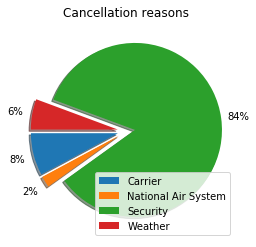

In [22]:
sizes = df.MONTH.groupby(df.CANCELLATION_CODE).sum()
labels = sizes.keys()
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(sizes, autopct='%1.0f%%', explode=explode, pctdistance=1.2, shadow=True, startangle=180)
plt.title('Cancellation reasons')
plt.legend(labels, loc="lower right")

From the above pie chart we can see that the major reason for cancellation is Security followed by Carrier, Weather and lastly National Air System.

#### Bar plot of flight status

Lets now see how many flights were cancelled or diverted and those that were proper. 

In [23]:
df_temp_1 = len(df[df['DIVERTED'] == 1])
df_temp_2 = len(df[df['CANCELLED'] == 1])
df_temp_3 = len(df) - df_temp_1 - df_temp_2
df_temp_1, df_temp_2, df_temp_3

(3004, 122250, 1704589)

In [24]:
# https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi
df_temp = pd.DataFrame({'DIVERTED': df_temp_1, 'CANCELLED': df_temp_2, 'PROPER' : df_temp_3}, index=[0])
df_temp

,DIVERTED,CANCELLED,PROPER
0,3004,122250,1704589


Text(0.5, 0, 'Flight status')

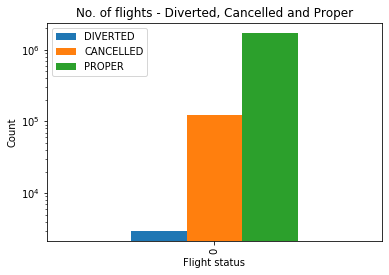

In [25]:
ax = df_temp.plot(kind='bar')
ax.set_title('No. of flights - Diverted, Cancelled and Proper')
plt.yscale("log")
ax.set_ylabel('Count')
ax.set_xlabel('Flight status')

Most of the times flights have been proper; followed by cancellations and then comes the diverted number.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

While analysing the number of flights that are diverted/cancelled and normal, we have used logarithmic scale for y-axis because the range (the difference between the smallest and the largest value in the data) is huge. 

### Bivariate plots

#### Box plot of Arrival and Departure delays

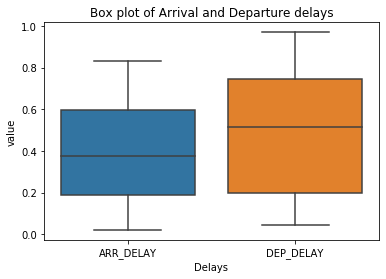

In [26]:
# https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
df_temp = pd.DataFrame(data = np.random.random(size=(15,2)), columns = ['ARR_DELAY', 'DEP_DELAY'])

sns.boxplot(x="variable", y="value", data=pd.melt(df_temp))
plt.title('Box plot of Arrival and Departure delays')
plt.xlabel('Delays')
plt.show()

The box plot indicates that departure delays tend to be higher than the arrival delays. The min, 1st Quartile, median, 3rd Quartile as well as maximum values of Departure delays are all at a level bit higher than that of Arrival delays.

Next, lets see some details specific to carriers. To make our reading better, lets first understand what the code values of OP_UNIQUE_CARRIER stand for. From the lookup table  available for carrier codes, the following values have been retrieved:

* 9E - Endeavor Air Inc.
* AA - American Airlines Inc.
* AS - Alaska Airlines Inc.
* B6 - JetBlue Airways
* DL - Delta Air Lines Inc.
* EV - ExpressJet Airlines LLC
* F9 - Frontier Airlines Inc.
* G4 - Allegiant Air
* HA - Hawaiian Airlines Inc.
* MQ - Envoy Air
* NK - Spirit Air Lines
* OH - PSA Airlines Inc.
* OO - SkyWest Airlines Inc.
* UA - United Air Lines Inc.
* WN - Southwest Airlines Co.
* YV - Mesa Airlines Inc.
* YX - Republic Airline

#### Which carrier has the most number of flight diversions?

Text(0.5, 1.0, 'Top 5 carriers who had the most number of flight diversions')

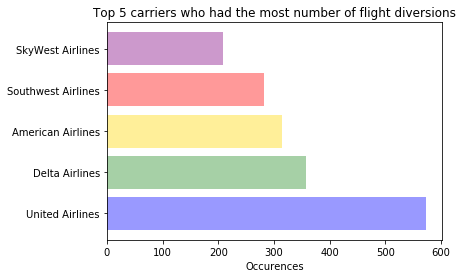

In [27]:
df_temp_1 = df[df['DIVERTED'] == 1]
most_diverted_carrier = df_temp_1.MONTH.groupby(df_temp_1.OP_UNIQUE_CARRIER).count()
labels = ['United Airlines', 'Delta Airlines', 'American Airlines', 'Southwest Airlines', 'SkyWest Airlines']

y_pos = np.arange(len(labels))
data = most_diverted_carrier.nlargest(5)
clr = ('blue', 'forestgreen', 'gold', 'red', 'purple')

h = plt.barh(y_pos, data, align='center', 
alpha=0.4, label=labels, color=clr)
plt.yticks(y_pos, labels)
plt.xlabel('Occurences')
plt.title('Top 5 carriers who had the most number of flight diversions')

#### Which carrier has the most number of flight cancellations?

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

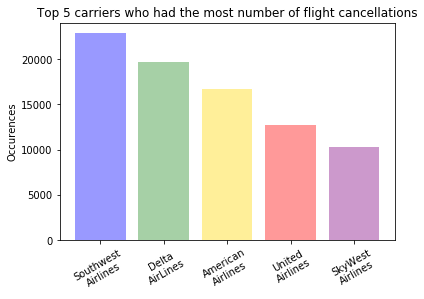

In [28]:
df_temp_2 = df[df['CANCELLED'] == 1]
most_cancelled_carrier = df_temp_2.MONTH.groupby(df_temp_2.OP_UNIQUE_CARRIER).count()
y_pos = np.arange(len(labels))
data = most_cancelled_carrier.nlargest(5)
clr = ('blue', 'forestgreen', 'gold', 'red', 'purple')
labels = ['Southwest\nAirlines','Delta\nAirLines','American\nAirlines','United\nAirlines','SkyWest\nAirlines']

h = plt.bar(y_pos, data, align='center', 
alpha=0.4, label=labels, color=clr)
plt.xticks(y_pos, labels)
plt.ylabel('Occurences')
plt.title('Top 5 carriers who had the most number of flight cancellations')
plt.xticks(rotation=30)

#### Which origin states and cities has the most number of flight cancellations?

Text(0.5, 1.0, 'States with most number of flights cancellations')

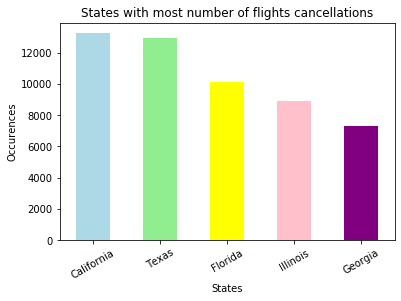

In [29]:
df_temp_2 = df[df['CANCELLED'] == 1]
most_cancelled_carrier = df_temp_2.MONTH.groupby(df_temp_2.ORIGIN_STATE_NM).count()
colors = ('lightblue', 'lightgreen', 'yellow', 'pink', 'purple')
most_cancelled_carrier.nlargest(5).plot(kind='bar', color=colors)
plt.xticks(rotation=30)
plt.xlabel('States')
plt.ylabel('Occurences')
plt.title('States with most number of flights cancellations')

Text(0.5, 1.0, 'Cities with most number of flights cancellations')

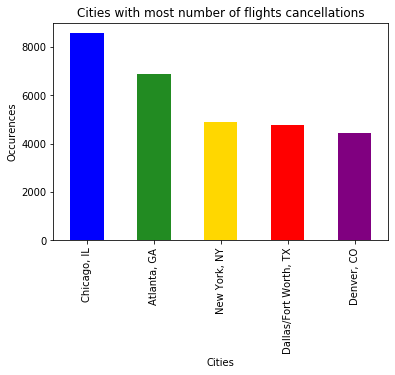

In [30]:
df_temp_2 = df[df['CANCELLED'] == 1]
most_cancelled_carrier = df_temp_2.MONTH.groupby(df_temp_2.ORIGIN_CITY_NAME).count()
colors = ('blue', 'forestgreen', 'gold', 'red', 'purple')

most_cancelled_carrier.nlargest(5).plot(kind='bar', color=colors)
plt.xlabel('Cities')
plt.ylabel('Occurences')
plt.title('Cities with most number of flights cancellations')

#### Which destination states and cities has the most diversions?

Text(0.5, 1.0, 'States with most number of flights diversions')

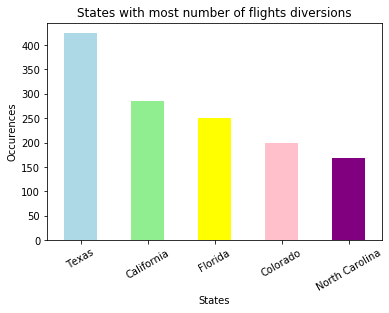

In [31]:
df_temp_2 = df[df['DIVERTED'] == 1]
most_cancelled_carrier = df_temp_2.MONTH.groupby(df_temp_2.DEST_STATE_NM).count()
colors = ('lightblue', 'lightgreen', 'yellow', 'pink', 'purple')

most_cancelled_carrier.nlargest(5).plot(kind='bar', color=colors)
plt.xlabel('States')
plt.xticks(rotation=30)
plt.ylabel('Occurences')
plt.title('States with most number of flights diversions')

Text(0.5, 1.0, 'Cities with most number of flights diversions')

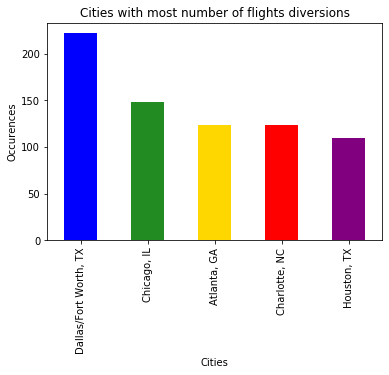

In [32]:
df_temp_2 = df[df['DIVERTED'] == 1]
most_cancelled_carrier = df_temp_2.MONTH.groupby(df_temp_2.DEST_CITY_NAME).count()
colors = ('blue', 'forestgreen', 'gold', 'red', 'purple')

most_cancelled_carrier.nlargest(5).plot(kind='bar', color=colors)
plt.xlabel('Cities')
plt.ylabel('Occurences')
plt.title('Cities with most number of flights diversions')

#### Is there any correlation between flight time and the departure delays?

Text(0.5, 1.0, 'Air time vs Departure delay')

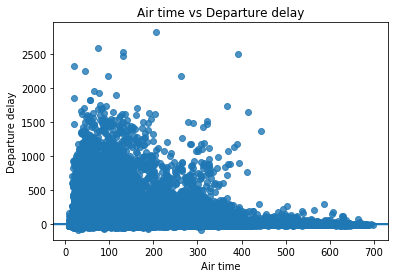

In [33]:
sns.regplot(data = df, x = 'AIR_TIME', y = 'DEP_DELAY', ci=None)
plt.xlabel('Air time')
plt.ylabel('Departure delay')
plt.title('Air time vs Departure delay')

In general, there is no relationship as the scatterplot looks like a square or oval. As AIR_TIME increases, in this case, it appears that DEP_DELAY typically appears to be lower as AIR_TIME increases. So, by eyeballing the data in the scatterplot there appears to be a negative relationship (although the relationship appears to be slight to none - as most of the data shows no relationship. To confirm that this relationship is significant, it is necessary to perform a test. However that is beyond the scope of this project.

Text(0.5, 1.0, 'Arrival delay vs Departure delay')

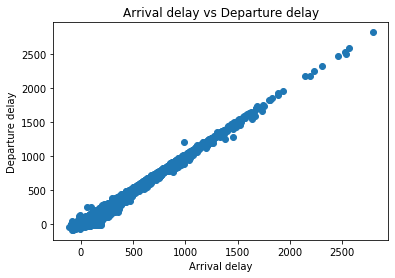

In [34]:
plt.scatter(data = df, x = 'ARR_DELAY', y = 'DEP_DELAY')
plt.xlabel('Arrival delay')
plt.ylabel('Departure delay')
plt.title('Arrival delay vs Departure delay')

From the above plot, it looks like there is a positive relationship between arrival and departure delays.

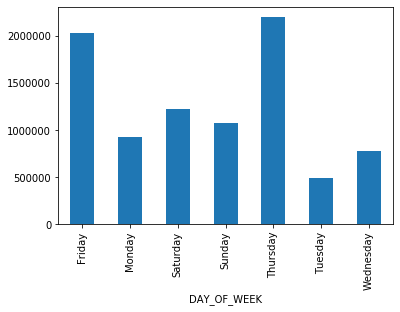

In [35]:
df.groupby(['DAY_OF_WEEK']).sum()['DEP_DELAY'].plot(kind='bar')

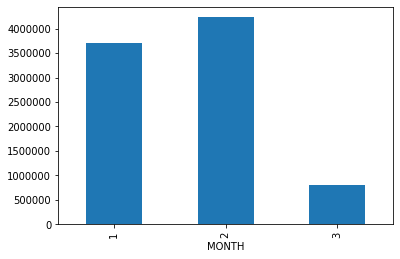

In [36]:
df.groupby(['MONTH']).sum()['DEP_DELAY'].plot(kind='bar')

C:\Users\Anant\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Anant\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


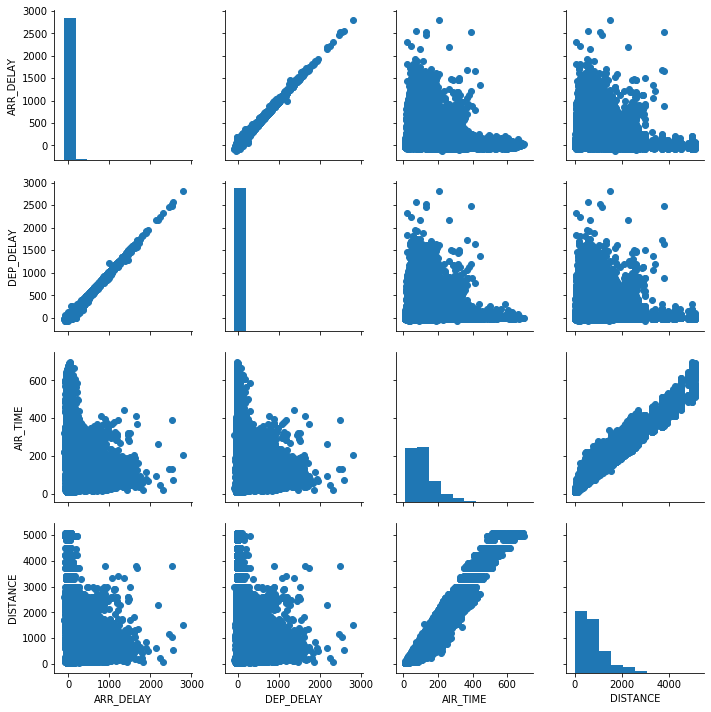

In [37]:
g = sns.PairGrid(data = df, vars = ['ARR_DELAY', 'DEP_DELAY', 'AIR_TIME', 'DISTANCE'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

#### Departure Delays grouped based on days of a month

Lets first group the days of a month into 5 - so as to see if the departure delays tend to increase or decrease towards the start/mid/end of a month. 

Text(0.5, 1.0, 'Departure delay according to days of a month grouped')

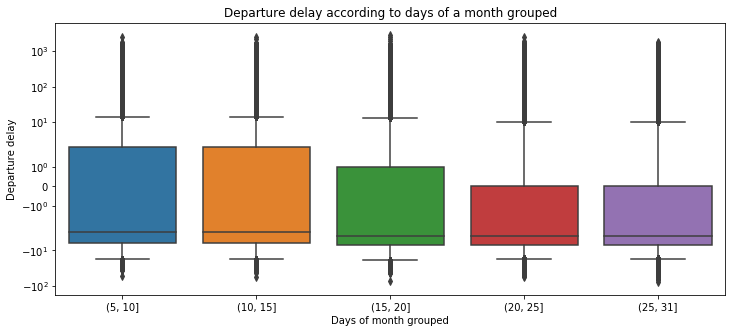

In [38]:
# https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8
df_temp = df.copy(True)
df_temp['MONTH_GROUP'] = pd.cut(df.DAY_OF_MONTH, [5,10,15,20,25,31])
plt.figure(figsize=(12,5))
plt.yscale('symlog')
g = sns.boxplot(x = "MONTH_GROUP", y = "DEP_DELAY", data=df_temp)
plt.xlabel('Days of month grouped')
plt.ylabel('Departure delay')
plt.title('Departure delay according to days of a month grouped')

Here we have chosen symlog for the y-axis scale as we also have negative delay times (meaning that the flight departed early). From the box plot, we can see that the 3rd quartile values of delays tend to reduce towards the middle of the month and then go down further for the 20th-25th dates.

Lets dig deeper and see day-wise departure delay details. 

Text(0, 0.5, 'Departure delay')

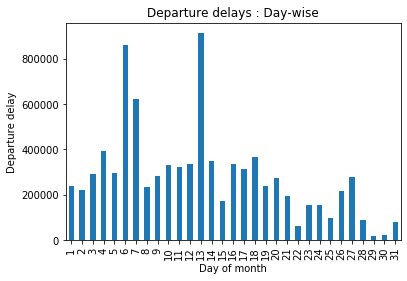

In [39]:
df.groupby(['DAY_OF_MONTH']).sum()['DEP_DELAY'].plot(kind='bar')
plt.title('Departure delays : Day-wise')
plt.xlabel('Day of month')
plt.ylabel('Departure delay')

This shows that the delay peaks at the middle of the month - on 13th to be exact and then it tapers towards the end of the month with 29th and 30th being the lowest. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The delays tend to increase towards end of the week (with week starting on Monday) and also towards the middle of the month. Also, the same set of carriers that had the most number of cancellations are present in the set of carriers that had the most number of diversions although the ranking differs.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The delays associated with origin state/cities and destination cities/state is in line with the fact that the same set of cities are home to the busiest airports in the USA based on this article, https://en.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States

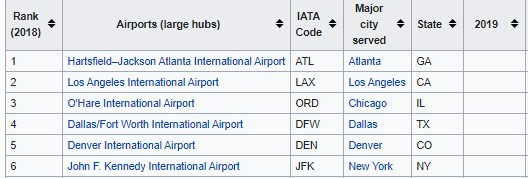


#### Multivariate Plot

#### Arrival and Departure delays based on carriers

In [40]:
df_temp = df[df['ARR_DELAY'] > 0]

In [41]:
df_temp.shape

(433555, 26)

In [42]:
df_temp['ARR_DELAY'].isnull().sum()

0

In [43]:
df_temp = df[df['DEP_DELAY'] > 0]

In [44]:
df_temp.shape

(427118, 26)

In [45]:
df_temp['DEP_DELAY'].isnull().sum()

0

Text(40.11943359375, 0.5, 'Departure delay')

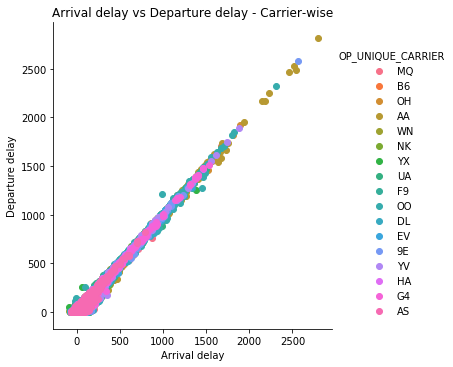

In [46]:
g = sns.FacetGrid(data = df_temp, hue = 'OP_UNIQUE_CARRIER', height = 5)
g.map(plt.scatter, 'ARR_DELAY', 'DEP_DELAY')
g.add_legend()
plt.title('Arrival delay vs Departure delay - Carrier-wise')
plt.xlabel('Arrival delay')
plt.ylabel('Departure delay')

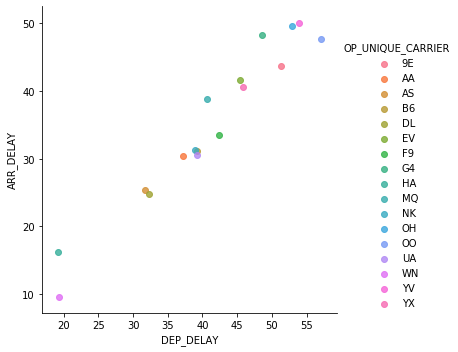

In [47]:
carrier_averages = df_temp.groupby('OP_UNIQUE_CARRIER').agg({'DEP_DELAY':'mean', 'ARR_DELAY':'mean'}).reset_index()
sns.lmplot('DEP_DELAY', 'ARR_DELAY', data=carrier_averages,
           fit_reg=False, hue='OP_UNIQUE_CARRIER', )
plt.show()

### Arrival delays based on every month's days of week

C:\Users\Anant\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


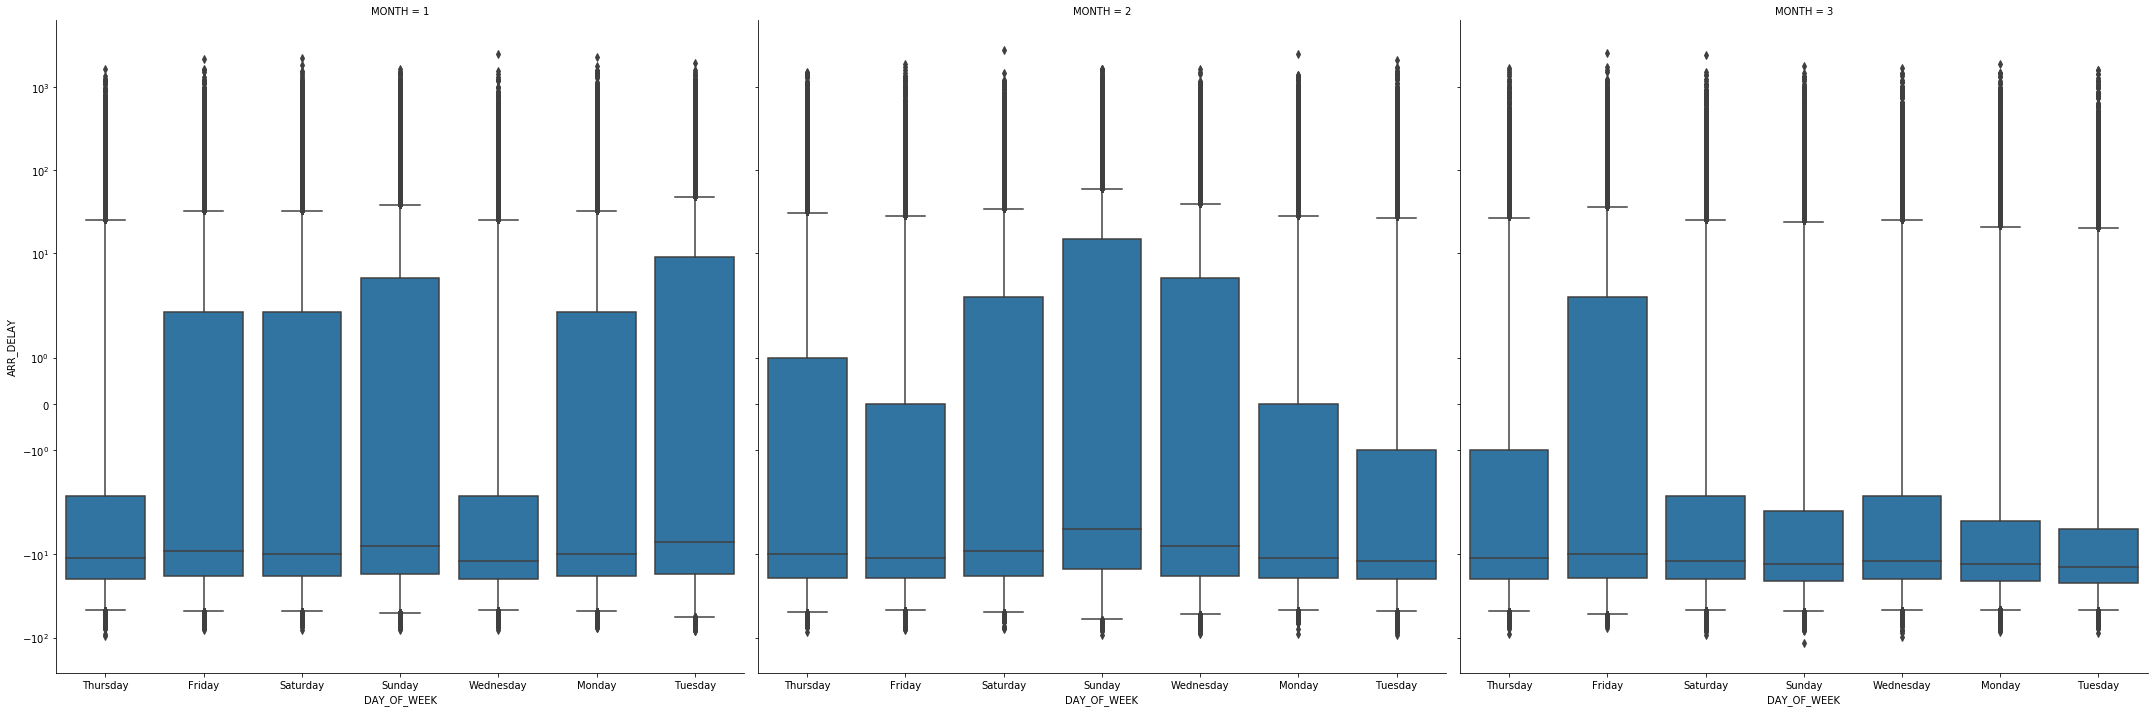

In [48]:
g = sns.FacetGrid(data = df,col = 'MONTH', height = 10)
g.map(sns.boxplot, 'DAY_OF_WEEK', 'ARR_DELAY')
plt.yscale('symlog')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of arrival delays against every day of the week for every month in the dataset (there are 3 - January, February and March). From the box plot, the delays are in general very less for the month of March. However the general observation of delays being higher on Fridays holds true across all the three months. 

### Were there any interesting or surprising interactions between features?

The arrival and departure delays have positive correlation - it is seen from both FacetGrid (with all data) and lmplot (with mean values of the delays for each of the carrier). The delays are also influenced by the day of month and day of week - with middle of the month and weekends being very busy i.e., having higher delays.